# Runge-Kutta Project

### Solving for ODE 
### F(t)=0, k=55.0 , gamma=.80 , and lastly mass=1.0

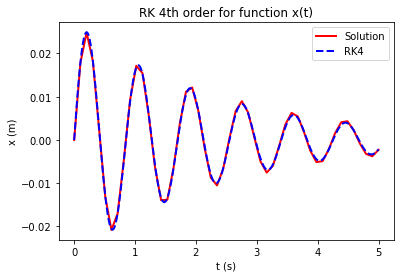

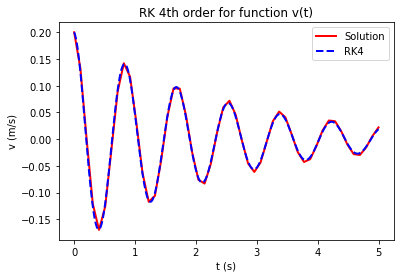

In [1]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

# Constants that will be used through out the program
k = 55.
gamma = .8
m = 1.0
C1 = 1./6
C2 = 2./6
C3 = 2./6
C4 = 1./6
A1 = 1./2
A2 = 1./2
A3 = 1.
B_21 = 1./2
B_31 = 0.
B_32 = 1./2
B_41 = 0.
B_42 = 0.
B_43 = 1.
f_over_m = lambda t: 0
fxy_x = lambda t, x, v: v
fxy_v = lambda t, x, v: f_over_m(t) - 2 * gamma * v - k * x
ti = 0.0
tf = 5.0
n = 375
dt = (tf - ti) / (n - 1)
t1 = np.linspace(ti, tf)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
X_iv = 0.0  
V_iv = 0.2  #Cant be zero
t[0] = ti
x[0] = X_iv
v[0] = V_iv

omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)

A = X_iv
B = V_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d




#Main Code
def Runge_Kutta_4_X (ti, xi, vi, dt):
    K1 = fxy_x(ti, xi, vi)
    K2 = fxy_x(ti + A1 * dt, xi + B_21 * K1 * dt, vi)
    K3 = fxy_x(ti + A2 * dt, xi + B_31 * K1 * dt + B_32 * K2 * dt, vi)
    K4 = fxy_x(ti + A3 * dt, xi + B_41 * K1 * dt + B_42 * K2 * dt + B_43 * K3 * dt, vi)
    X_ip = xi + (C1 * K1 + C2 * K2 + C3 * K3 + C4 * K4) * dt
    return X_ip

def Runge_Kutta_4_V (ti, xi, vi, dt):
    K1 = fxy_v(ti, xi, vi)
    K2 = fxy_v(ti + A1 * dt, xi, vi + B_21 * K1 * dt)
    K3 = fxy_v(ti + A2 * dt, xi, vi + B_31 * K1 * dt + B_32 * K2 * dt)
    K4 = fxy_v(ti + A3 * dt, xi, vi + B_41 * K1 * dt + B_42 * K2 * dt + B_43 * K3 * dt)
    V_ip = vi + (C1 * K1 + C2 * K2 + C3 * K3 + C4 * K4) * dt
    return V_ip

def x_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))


def v_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (
            omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))

for i in range(1, n):
    t[i] = ti + i * dt
    x[i] = Runge_Kutta_4_X(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = Runge_Kutta_4_V(t[i - 1], x[i - 1], v[i - 1], dt)
    x_ud = [x_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in t1]
    v_ud = [v_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in t1]


    
    
    
#Graph 1
plt.plot(t1, x_ud, label = "Solution", color = "r", linewidth = "2.0")
plt.plot(t, x, label = "RK4", color = "b", linestyle = "--", linewidth = "2.0")
plt.title("RK 4th order for function x(t)")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()

#Graph 2
plt.plot(t1, v_ud, label = "Solution", color = "r", linewidth = "2.0")
plt.plot(t, v, label = "RK4", color = "b", linestyle = "--", linewidth = "2.0")
plt.title("RK 4th order for function v(t)")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()

#Although the first part just asks to solve for the ODE, I included the graph for the actual answer for comparing purposes.
#I couldn't figure out how to get my answer more accurate than the actual answer

### OverDamping

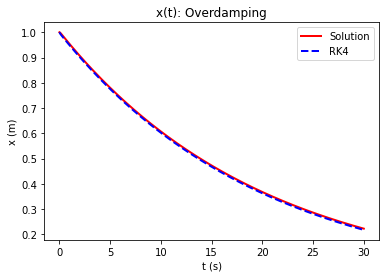

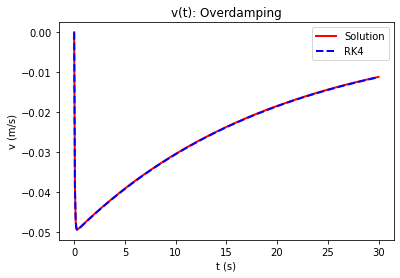

In [2]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

# Constants that will be used through out the program
k = 2.0
gamma = 1.0
m = 2.0
C1 = 1./6
C2 = 2./6
C3 = 2./6
C4 = 1./6
A1 = 1./2
A2 = 1./2
A3 = 1.
B_21 = 1./2
B_31 = 0.
B_32 = 1./2
B_41 = 0.
B_42 = 0.
B_43 = 1.
#f_over_m = lambda t: 0
fxy_v = lambda t, x, v: -(lambda_I / (lambda_I - lambda_II) * exp(lambda_I * t)) + (-lambda_II / (lambda_II - lambda_I) * exp(lambda_II * t))
fxy_x = lambda t, x, v: -1 / (lambda_I - lambda_II) * exp(lambda_I * t) + 1 / (lambda_II - lambda_I) * exp(lambda_II * t)
ti = 0.0 #same
tf = 30.0 #different
n = 400 #different
dt = (tf - ti) / (n - 1)
t1 = np.linspace(ti, tf, n) #n is added
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
X_iv = 1.0  
V_iv = 0.0  
t[0] = ti
x[0] = X_iv
v[0] = V_iv

omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)

zeta_OD = 10 #Added for overdamping
lambda_I = -omega_n * (zeta_OD - sqrt(zeta_OD ** 2 - 1)) #Added for overdamping
lambda_II = -omega_n * (zeta_OD + sqrt(zeta_OD ** 2 - 1)) #Added for overdamping

A = X_iv
B = V_iv
DI_OD = (B - A * lambda_II) / (lambda_I - lambda_II)
DII_OD = (A * lambda_I - B) / (lambda_I - lambda_II)


# Main Code
def Runge_Kutta_4_X (ti, xi, vi, dt):
    K1 = fxy_x(ti, xi, vi)
    K2 = fxy_x(ti + A1 * dt, xi + B_21 * K1 * dt, vi)
    K3 = fxy_x(ti + A2 * dt, xi + B_31 * K1 * dt + B_32 * K2 * dt, vi)
    K4 = fxy_x(ti + A3 * dt, xi + B_41 * K1 * dt + B_42 * K2 * dt + B_43 * K3 * dt, vi)
    X_ip = xi + (C1 * K1 + C2 * K2 + C3 * K3 + C4 * K4) * dt
    return X_ip

def Runge_Kutta_4_V (ti, xi, vi, dt):
    K1 = fxy_v(ti, xi, vi)
    K2 = fxy_v(ti + A1 * dt, xi, vi + B_21 * K1 * dt)
    K3 = fxy_v(ti + A2 * dt, xi, vi + B_31 * K1 * dt + B_32 * K2 * dt)
    K4 = fxy_v(ti + A3 * dt, xi, vi + B_41 * K1 * dt + B_42 * K2 * dt + B_43 * K3 * dt)
    V_ip = vi + (C1 * K1 + C2 * K2 + C3 * K3 + C4 * K4) * dt
    return V_ip

def X_of_t (DI, DII, lI, lII, t): #Different due to Overdamping
    return DI * exp(lI * t) + DII * exp(lII * t)


def V_of_t (DI, DII, lI, lII, t): #Different due to Overdamping
    return DI * lI * exp(lI * t) + DII * lII * exp(lII * t)

for i in range(1, n):
    t[i] = ti + i * dt
    x[i] = Runge_Kutta_4_X(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = Runge_Kutta_4_V(t[i - 1], x[i - 1], v[i - 1], dt)
    x_OD = [X_of_t(DI_OD, DII_OD, lambda_I, lambda_II, tval) for tval in t1]
    v_OD = [V_of_t(DI_OD, DII_OD, lambda_I, lambda_II, tval) for tval in t1]

    
    
    
# Graph 1
plt.plot(t1, x_OD, label = "Solution", color = "r", linewidth = "2.0")
plt.plot(t, x, label = "RK4", color = "b", linestyle = "--", linewidth = "2.0")
plt.title("x(t): Overdamping")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()

#Graph 2
plt.plot(t1, v_OD, label = "Solution", color = "r", linewidth = "2.0")
plt.plot(t, v, label = "RK4", color = "b", linestyle = "--", linewidth = "2.0")
plt.title("v(t): Overdamping")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()
#More accurate than part 1

### Critically Damping

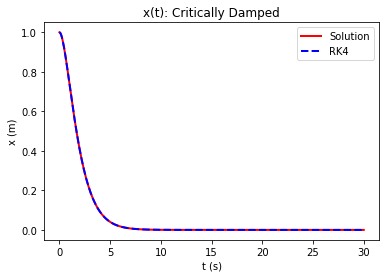

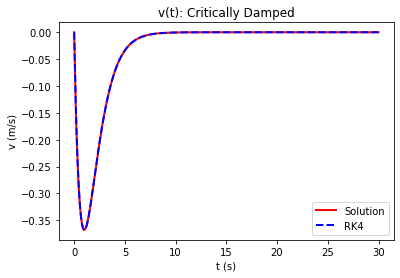

In [3]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

# Constants that will be used through out the program
k = 2.0
gamma = 1.0
m = 2.0
C1 = 1./6
C2 = 2./6
C3 = 2./6
C4 = 1./6
A1 = 1./2
A2 = 1./2
A3 = 1.
B_21 = 1./2
B_31 = 0.
B_32 = 1./2
B_41 = 0.
B_42 = 0.
B_43 = 1.
#f_over_m = lambda t: 0
fxy_v = lambda t, x, v: -DI_CD * exp(-omega_n * t) + DII_CD * t * exp(-omega_n * t)
fxy_x = lambda t, x, v: exp(-omega_n * t) * (-omega_n * DI_CD + DII_CD * (1 - omega_n * t))
ti = 0.0 #same
tf = 30.0 #same as overdamped
n = 400 #same as overdamped
dt = (tf - ti) / (n - 1)
t1 = np.linspace(ti, tf, n) 
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
X_iv = 1.0  #same as overdamped
V_iv = 0.0  #same as overdamped
t[0] = ti
x[0] = X_iv
v[0] = V_iv

omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)

zeta_CD = 10 #Added for overdamping
lambda_I = -omega_n * (zeta_CD - sqrt(zeta_CD ** 2 - 1)) 
lambda_II = -omega_n * (zeta_CD + sqrt(zeta_CD ** 2 - 1)) 

A = X_iv
B = V_iv
DI_CD = A
DII_CD = B + omega_n * A


# Main Code
def Runge_Kutta_4_X (ti, xi, vi, dt):
    K1 = fxy_x(ti, xi, vi)
    K2 = fxy_x(ti + A1 * dt, xi + B_21 * K1 * dt, vi)
    K3 = fxy_x(ti + A2 * dt, xi + B_31 * K1 * dt + B_32 * K2 * dt, vi)
    K4 = fxy_x(ti + A3 * dt, xi + B_41 * K1 * dt + B_42 * K2 * dt + B_43 * K3 * dt, vi)
    X_ip = xi + (C1 * K1 + C2 * K2 + C3 * K3 + C4 * K4) * dt
    return X_ip

def Runge_Kutta_4_V (ti, xi, vi, dt):
    K1 = fxy_v(ti, xi, vi)
    K2 = fxy_v(ti + A1 * dt, xi, vi + B_21 * K1 * dt)
    K3 = fxy_v(ti + A2 * dt, xi, vi + B_31 * K1 * dt + B_32 * K2 * dt)
    K4 = fxy_v(ti + A3 * dt, xi, vi + B_41 * K1 * dt + B_42 * K2 * dt + B_43 * K3 * dt)
    V_ip = vi + (C1 * K1 + C2 * K2 + C3 * K3 + C4 * K4) * dt
    return V_ip

def XCD_of_t (DI, DII, omega_n, t):
    return DI * exp(-omega_n * t) + DII * t * exp(-omega_n * t)

def VCD_of_t (DI, DII, omega_n, t):
    return exp(-omega_n * t) * (-omega_n * DI + DII * (1 - omega_n * t))


for i in range(1, n):
    t[i] = ti + i * dt
    x[i] = Runge_Kutta_4_X(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = Runge_Kutta_4_V(t[i - 1], x[i - 1], v[i - 1], dt)
    x_CD = [XCD_of_t(DI_CD, DII_CD, omega_n, tval) for tval in t1]
    v_CD = [VCD_of_t(DI_CD, DII_CD, omega_n, tval) for tval in t1]

    
    
    
# Graph 1
plt.plot(t1, x_CD, label = "Solution", color = "r", linewidth = "2.0")
plt.plot(t, x, label = "RK4", color = "b", linestyle = "--", linewidth = "2.0")
plt.title("x(t): Critically Damped")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()

#Graph 2
plt.plot(t1, v_CD, label = "Solution", color = "r", linewidth = "2.0")
plt.plot(t, v, label = "RK4", color = "b", linestyle = "--", linewidth = "2.0")
plt.title("v(t): Critically Damped")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()

### Under Damping

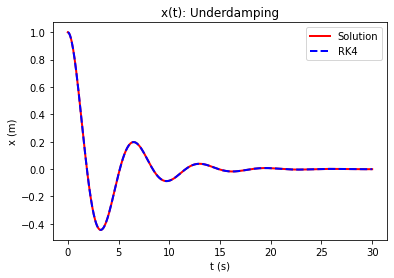

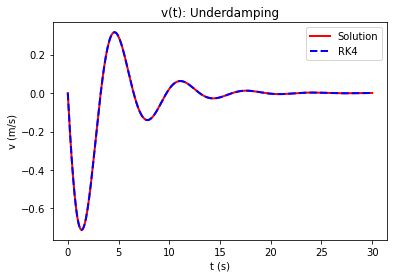

In [4]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

# Constants that will be used through out the program
k = 2.0
gamma = 1.0
m = 2.0
C1 = 1./6
C2 = 2./6
C3 = 2./6
C4 = 1./6
A1 = 1./2
A2 = 1./2
A3 = 1.
B_21 = 1./2
B_31 = 0.
B_32 = 1./2
B_41 = 0.
B_42 = 0.
B_43 = 1.
#f_over_m = lambda t: 0
fxy_v = lambda t, x, v: exp(-zeta_ud * omega_n * t) * (-DI * cos(omega_d * t) + DII * sin(omega_d * t))
fxy_x = lambda t, x, v: exp(-zeta_ud * omega_n * t) * (
		-DI * (omega_d * sin(omega_d * t) + zeta_ud * omega_n * cos(omega_d * t)) + DII * (
		omega_d * cos(omega_d * t) - zeta_ud * omega_n * sin(omega_d * t)))
ti = 0.0 #same
tf = 30.0 #same
n = 400 #same
dt = (tf - ti) / (n - 1)
t1 = np.linspace(ti, tf, n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
X_iv = 1.0  
V_iv = 0.0  
t[0] = ti
x[0] = X_iv
v[0] = V_iv

omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)

zeta_OD = 10 #Added for overdamping
lambda_I = -omega_n * (zeta_OD - sqrt(zeta_OD ** 2 - 1)) #Added for underdamping
lambda_II = -omega_n * (zeta_OD + sqrt(zeta_OD ** 2 - 1)) #Added for underdamping

A = X_iv
B = V_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d


# Main Code
def Runge_Kutta_4_X (ti, xi, vi, dt):
    K1 = fxy_x(ti, xi, vi)
    K2 = fxy_x(ti + A1 * dt, xi + B_21 * K1 * dt, vi)
    K3 = fxy_x(ti + A2 * dt, xi + B_31 * K1 * dt + B_32 * K2 * dt, vi)
    K4 = fxy_x(ti + A3 * dt, xi + B_41 * K1 * dt + B_42 * K2 * dt + B_43 * K3 * dt, vi)
    X_ip = xi + (C1 * K1 + C2 * K2 + C3 * K3 + C4 * K4) * dt
    return X_ip

def Runge_Kutta_4_V (ti, xi, vi, dt):
    K1 = fxy_v(ti, xi, vi)
    K2 = fxy_v(ti + A1 * dt, xi, vi + B_21 * K1 * dt)
    K3 = fxy_v(ti + A2 * dt, xi, vi + B_31 * K1 * dt + B_32 * K2 * dt)
    K4 = fxy_v(ti + A3 * dt, xi, vi + B_41 * K1 * dt + B_42 * K2 * dt + B_43 * K3 * dt)
    V_ip = vi + (C1 * K1 + C2 * K2 + C3 * K3 + C4 * K4) * dt
    return V_ip

def XUD_of_t (DI, DII, zeta, omega_n, omega_d, t):
	return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))


def VUD_of_t (DI, DII, zeta, omega_n, omega_d, t):
	return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (
			omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))


for i in range(1, n):
    t[i] = ti + i * dt
    x[i] = Runge_Kutta_4_X(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = Runge_Kutta_4_V(t[i - 1], x[i - 1], v[i - 1], dt)
    x_OD = [XUD_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in t1]
    v_OD = [VUD_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in t1]

    
    
    
# Graph 1
plt.plot(t1, x_OD, label = "Solution", color = "r", linewidth = "2.0")
plt.plot(t, x, label = "RK4", color = "b", linestyle = "--", linewidth = "2.0")
plt.title("x(t): Underdamping")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()

#Graph 2
plt.plot(t1, v_OD, label = "Solution", color = "r", linewidth = "2.0")
plt.plot(t, v, label = "RK4", color = "b", linestyle = "--", linewidth = "2.0")
plt.title("v(t): Underdamping")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()